# Notebook for plotting manuscript results

In [1]:
import crofton_method as cfm
reload(cfm)
import pandas as pd
%pylab inline
plt.style.use('ggplot')

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = False

Couldn't import dot_parser, loading of dot files will not be possible.
Populating the interactive namespace from numpy and matplotlib


In [19]:
# Define plotting function
def plot_simulations(sims, a_b_vec, file_name, N_vals, ylims=[(-2, 0.5), (0, 100)], methods=["Alt", "Like", "Adjei"]):
    """ List of simulations """
    
    colors = plt.rcParams['axes.color_cycle']
    colors = ["black", "grey", "#E8E8E8"]
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes = axes.ravel()
    for ax in axes:
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()
    alpha = 1
    lwd = 2
    
    for i, sim in enumerate(sims):

        w2_a_bias_vec, w2_a_prec_vec = zip(*sim[0])
        w2_b_bias_vec, w2_b_prec_vec = zip(*sim[1])

        adjei_a_bias_vec, adjei_a_prec_vec = zip(*sim[2])
        adjei_b_bias_vec, adjei_b_prec_vec = zip(*sim[3])
        
        like_a_bias_vec, like_a_prec_vec = zip(*sim[4])
        like_b_bias_vec, like_b_prec_vec = zip(*sim[5])
        
        if "Alt" in methods:
            axes[0].semilogx(N_vals, w2_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="-", 
                                         label=r"Alt. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    #         axes[0].semilogx(N_vals, w2_b_bias_vec, lw=1, ls='--', color=colors[2*i], 
    #                                          label=r"Alt. Method $b = %.1f$" % a_b_vec[i][1], basex=10)           
            axes[1].semilogx(N_vals, w2_a_prec_vec, lw=lwd, alpha=alpha, color=colors[i], ls="-", 
                                         label=r"Alt. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    #         axes[1].semilogx(N_vals, np.abs(w2_b_prec_vec), lw=1, ls='--', color=colors[2*i], 
    #                                          label=r"Alt. Method $b = %.1f$" % a_b_vec[i][1], basex=10)
        
        if "Adjei" in methods:
            axes[0].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                         label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    #       axes[0].semilogx(N_vals, adjei_b_bias_vec, lw=1, ls=':', color=colors[2*i + 2], 
    #                                         label=r"Adjei Method $b = %.1f$" % a_b_vec[i][1], basex=10)
            axes[1].semilogx(N_vals, adjei_a_prec_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":",
                                         label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    #       axes[1].semilogx(N_vals, np.abs(adjei_b_prec_vec), lw=1, ls=':', color=colors[2*i + 1], 
    #                                             label=r"Adjei Method $b = %.1f$" % a_b_vec[i][1], basex=10)
    
    
        if "Like" in methods:
            axes[0].semilogx(N_vals, like_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="--" ,
                                         label=r"Like Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    #         axes[0].semilogx(N_vals, like_b_bias_vec, lw=1, ls=':', color=colors[2*i + 2], 
    #                                         label=r"Like Method $b = %.1f$" % a_b_vec[i][1], basex=10)
    
            axes[1].semilogx(N_vals, np.abs(like_a_prec_vec), lw=lwd, color=colors[i], ls="--", 
                                            label=r"Like Method $a = %.1f$,$b = %.1f$" % a_b_vec[i], basex=10)
    #         axes[1].semilogx(N_vals, np.abs(like_b_prec_vec), lw=1, ls=':', color=colors[2*i + 2], 
    #                                             label=r"Like Method $b = %.1f$" % a_b_vec[i][1], basex=10)

        
    axes[0].set_ylabel("Standardized Bias")
    axes[0].set_xlabel(r"$\log{N_p}$")
    axes[1].set_ylabel("CV * 100")
    axes[1].set_xlabel(r"$\log{N_p}$")
    axes[0].set_ylim(ylims[0])
    axes[1].set_ylim(ylims[1])
    axes[0].set_xlim((10**2, 10**4.5))
    axes[1].set_xlim((10**2, 10**4.5))
    axes[0].hlines(0, 10**2, 10**4.5, linestyle="--", color="red")


    axes[1].legend(loc="upper right", prop={'size' : 8})
    axes[0].legend(loc="lower right", prop={'size' : 8})
    plt.tight_layout()
    fig.savefig("../results/" + file_name, dpi=300)

In [11]:
# Define plotting function
def plot_bias(sims, a_b_vec, file_name, N_vals, ylims=(-2, 0.5), ks=[1, 1, 0.5, 0.5]):
    """ List of simulations """
    
    method = ["Chi-squared Method", "Likelihood Method", "Chi-squared Method", "Likelihood Method",  "Chi-squared Method", "Likelihood Method"]
    colors = ["black", "grey", "#B8B8B8"]
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))
    axes = axes.ravel()
    for ax in axes:
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()
    alpha = 1
    lwd = 2
    
    for i, sim in enumerate(sims[0]):

        w2_a_bias_vec, w2_a_prec_vec = zip(*sim[0])
        w2_b_bias_vec, w2_b_prec_vec = zip(*sim[1])

        adjei_a_bias_vec, adjei_a_prec_vec = zip(*sim[2])
        adjei_b_bias_vec, adjei_b_prec_vec = zip(*sim[3])
        
        like_a_bias_vec, like_a_prec_vec = zip(*sim[4])
        like_b_bias_vec, like_b_prec_vec = zip(*sim[5])
        
        axes[0].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                     label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        
        axes[1].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
#         axes[1].semilogx(N_vals, adjei_b_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
#                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
#         axes[0].semilogx(N_vals, adjei_b_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
#                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        

        axes[0].semilogx(N_vals, w2_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="-", 
                                     label=r"Chi. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        axes[1].semilogx(N_vals, like_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="--" ,
                                     label=r"Like. Method $a = %.1f, $b = %.1f$" % a_b_vec[i], basex=10)

    for i, sim in enumerate(sims[1]):

        w2_a_bias_vec, w2_a_prec_vec = zip(*sim[0])
        w2_b_bias_vec, w2_b_prec_vec = zip(*sim[1])

        adjei_a_bias_vec, adjei_a_prec_vec = zip(*sim[2])
        adjei_b_bias_vec, adjei_b_prec_vec = zip(*sim[3])
        
        like_a_bias_vec, like_a_prec_vec = zip(*sim[4])
        like_b_bias_vec, like_b_prec_vec = zip(*sim[5])
        
        axes[2].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                     label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        
        axes[3].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                     label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
#         axes[2].semilogx(N_vals, adjei_b_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
#                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
#         axes[3].semilogx(N_vals, adjei_b_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
#                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        

        axes[2].semilogx(N_vals, w2_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="-", 
                                     label=r"Chi. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        axes[3].semilogx(N_vals, like_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="--" ,
                                     label=r"Like. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    
    for i, sim in enumerate(sims[2]):

        w2_a_bias_vec, w2_a_prec_vec = zip(*sim[0])
        w2_b_bias_vec, w2_b_prec_vec = zip(*sim[1])

        adjei_a_bias_vec, adjei_a_prec_vec = zip(*sim[2])
        adjei_b_bias_vec, adjei_b_prec_vec = zip(*sim[3])
        
        like_a_bias_vec, like_a_prec_vec = zip(*sim[4])
        like_b_bias_vec, like_b_prec_vec = zip(*sim[5])
        
        axes[4].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                     label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        
        axes[5].semilogx(N_vals, adjei_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
                                     label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
#         axes[2].semilogx(N_vals, adjei_b_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
#                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
#         axes[3].semilogx(N_vals, adjei_b_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls=":", 
#                                      label=r"Adjei Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        

        axes[4].semilogx(N_vals, w2_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="-", 
                                     label=r"Chi. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
        axes[5].semilogx(N_vals, like_a_bias_vec, lw=lwd, alpha=alpha, color=colors[i], ls="--" ,
                                     label=r"Like. Method $a = %.1f$, $b = %.1f$" % a_b_vec[i], basex=10)
    
    for i, ax in enumerate(axes):
        ax.text(0.5, 0.95, method[i] + r", $k = %.2f$" % ks[i], horizontalalignment="center", transform=ax.transAxes)
        ax.set_ylabel("Standardized Bias")
        ax.set_xlabel(r"$\log{N_p}$")
        ax.set_ylim(ylims)
        ax.set_xlim((10**2, 10**4.5))
        ax.hlines(0, 10**2, 10**4.5, linestyle="--", color="red", alpha=0.5)
        ax.legend(loc="lower right", prop={'size' : 6})

    plt.tight_layout()
    fig.savefig("../results/" + file_name, dpi=300)

## Scenario I, k=1, k=0.5, k=0.1

Plotting the bias results for Scenario I with k=0.5 and k=1

In [2]:
reload(cfm)
# Load in data from LD50 = exp(2): a=20, b=-10
plot_vals_full_sim = pd.read_pickle("../results/without_crofton_fit_multiple_Np.pkl")
N_avgs_full_sim = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs.pkl")

# Load in data from LD50 = exp(2): a=10, b=-5
plot_vals_full_sim2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np2.pkl")
N_avgs_full_sim2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs2.pkl")

# Load in data from LD50 = exp(2): a=30, b=-15
plot_vals_full_sim3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np3.pkl")
N_avgs_full_sim3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs3.pkl")

N_vals_k1 = [N_avgs_full_sim2, N_avgs_full_sim,  N_avgs_full_sim3]

In [3]:
# Load in data from LD50 = exp(2): a=20, b=-10
plot_vals_full_sim_kpoint5 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint5_1.pkl")
N_avgs_full_sim_kpoint5 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint5_1.pkl")

# # Load in data from LD50 = exp(2): a=10, b=-5
plot_vals_full_sim_kpoint5_2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint5_2.pkl")
N_avgs_full_sim_kpoint5_2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint5_2.pkl")

# # Load in data from LD50 = exp(2): a=30, b=-15
plot_vals_full_sim_kpoint5_3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint5_3.pkl")
N_avgs_full_sim_kpoint5_3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint5_3.pkl")

# Storing average Ns for easy use later
N_vals_kpoint5 = [N_avgs_full_sim_kpoint5_2, N_avgs_full_sim_kpoint5,  N_avgs_full_sim_kpoint5_3]

In [4]:
# Load in data from LD50 = exp(2): a=20, b=-10
plot_vals_full_sim_kpoint1 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint1_1.pkl")
N_avgs_full_sim_kpoint1 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint1_1.pkl")

# # Load in data from LD50 = exp(2): a=10, b=-5
plot_vals_full_sim_kpoint1_2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint1_2.pkl")
N_avgs_full_sim_kpoint1_2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint1_2.pkl")

# # Load in data from LD50 = exp(2): a=30, b=-15
plot_vals_full_sim_kpoint1_3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint1_3.pkl")
N_avgs_full_sim_kpoint1_3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint1_3.pkl")

N_vals_kpoint1 = [N_avgs_full_sim_kpoint1_2, N_avgs_full_sim_kpoint1, N_avgs_full_sim_kpoint1_3]

In [5]:
reload(cfm)
# Extract results
first_sim = cfm.extract_parameters(plot_vals_full_sim, 20, -10, 10, 1)
second_sim = cfm.extract_parameters(plot_vals_full_sim2, 10, -5, 10, 1)
third_sim = cfm.extract_parameters(plot_vals_full_sim3, 30, -15, 10, 1)

LD50_k1 = [second_sim[6], first_sim[6],  third_sim[6]]

# Extract results
first_sim_lowk = cfm.extract_parameters(plot_vals_full_sim_kpoint5, 20, -10, 10, 0.5)
second_sim_lowk = cfm.extract_parameters(plot_vals_full_sim_kpoint5_2, 10, -5, 10, 0.5)
third_sim_lowk = cfm.extract_parameters(plot_vals_full_sim_kpoint5_3, 30, -15, 10, 0.5)

LD50_kpoint5 = [second_sim_lowk[6], first_sim_lowk[6], third_sim_lowk[6]]

# Extract results
first_sim_lowerk = cfm.extract_parameters(plot_vals_full_sim_kpoint1, 20, -10, 10, 0.1)
second_sim_lowerk = cfm.extract_parameters(plot_vals_full_sim_kpoint1_2, 10, -5, 10, 0.1)
third_sim_lowerk = cfm.extract_parameters(plot_vals_full_sim_kpoint1_3, 30, -15, 10, 0.1)

LD50_kpoint1 = [second_sim_lowerk[6], first_sim_lowerk[6], third_sim_lowerk[6]]

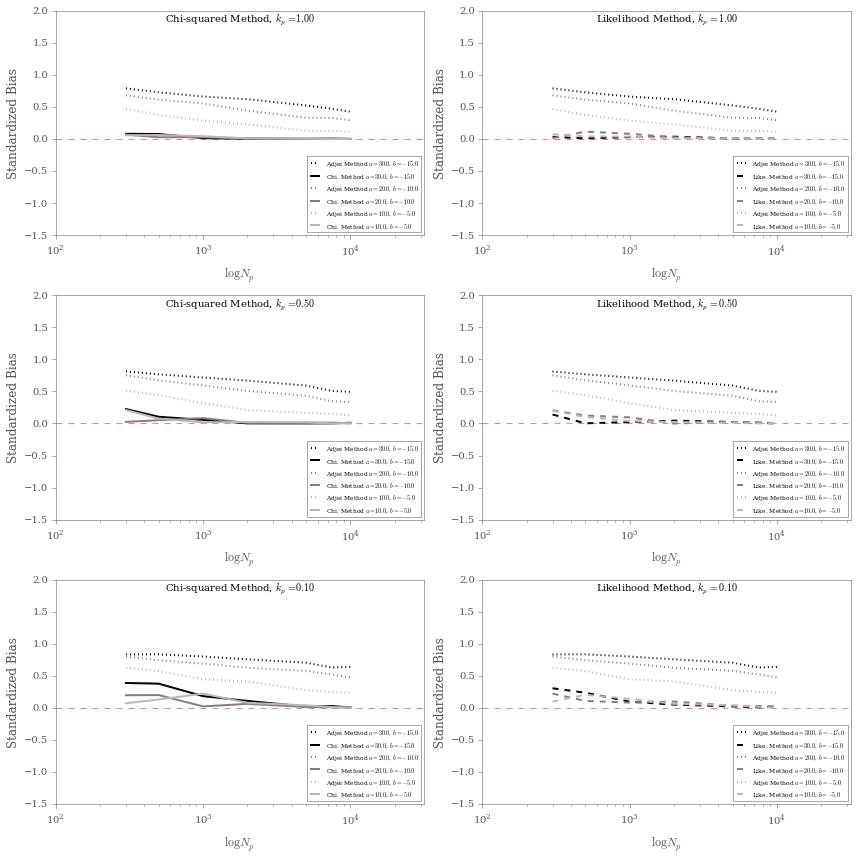

In [8]:
# Plot the biases for the a and b estimates 
reload(cfm)
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000] 
cfm.plot_bias([[third_sim, first_sim, second_sim], [third_sim_lowk, first_sim_lowk, second_sim_lowk],
           [third_sim_lowerk, first_sim_lowerk, second_sim_lowerk]] , [(30, -15), (20, -10), (10, -5)], 
                 "scenario1_bias_LD502.pdf", N_vals, ks=[1, 1, 0.5, 0.5, 0.1, 0.1], 
                 ylims=(-1.5, 2), figsize=(12, 12))

## Plotting the bias of LD50 estimates for the three methods for scenario I

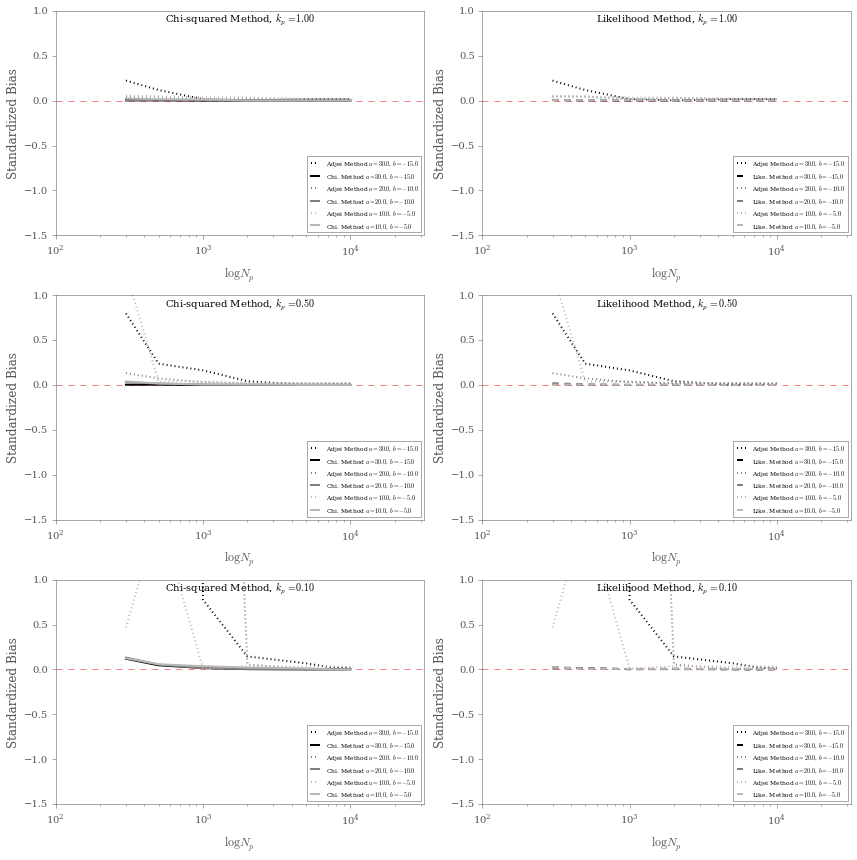

In [24]:
# Plot the biases for the LD50 estimates
reload(cfm)
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000] 
cfm.plot_bias([[third_sim, first_sim, second_sim], [third_sim_lowk, first_sim_lowk, second_sim_lowk],
           [third_sim_lowerk, first_sim_lowerk, second_sim_lowerk]] , [(30, -15), (20, -10), (10, -5)], 
                 "scenario1_bias_just_ld50.pdf", N_vals, ks=[1, 1, 0.5, 0.5, 0.1, 0.1], 
                 ylims=(-1.5, 1), figsize=(12, 12), ld50=True)

In [ ]:
# Plot the biases for the LD50 estimates
reload(cfm)
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000] 
cfm.plot_bias([[third_sim, first_sim, second_sim], [third_sim_lowk, first_sim_lowk, second_sim_lowk],
           [third_sim_lowerk, first_sim_lowerk, second_sim_lowerk]] , [(30, -15), (20, -10), (10, -5)], 
                 "scenario1_bias_just_ld50.png", N_vals, ks=[1, 1, 0.5, 0.5, 0.1, 0.1], 
                 ylims=(-1.5, 1), figsize=(12, 12), ld50=True, index=7)

## Scenario I, k=0.5

Given that we know the the pre-mortality values, can the methods estimate $a$ and $b$?  Making plots of the simulation results.  Just plotting for LD50 = exp(2).

In [114]:
# Load in data from LD50 = exp(2): a=20, b=-10
plot_vals_full_sim_kpoint5 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint5_1.pkl")
N_avgs_full_sim_kpoint5 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint5_1.pkl")

# # Load in data from LD50 = exp(2): a=10, b=-5
plot_vals_full_sim_kpoint5_2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint5_2.pkl")
N_avgs_full_sim_kpoint5_2 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint5_2.pkl")

# # Load in data from LD50 = exp(2): a=30, b=-15
plot_vals_full_sim_kpoint5_3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_kpoint5_3.pkl")
N_avgs_full_sim_kpoint5_3 = pd.read_pickle("../results/without_crofton_fit_multiple_Np_Navgs_kpoint5_3.pkl")

In [115]:
# Extract results
first_sim_lowk = cfm.extract_parameters(plot_vals_full_sim_kpoint5, 20, -10)
second_sim_lowk = cfm.extract_parameters(plot_vals_full_sim_kpoint5_2, 10, -5)
third_sim_lowk = cfm.extract_parameters(plot_vals_full_sim_kpoint5_3, 30, -15)

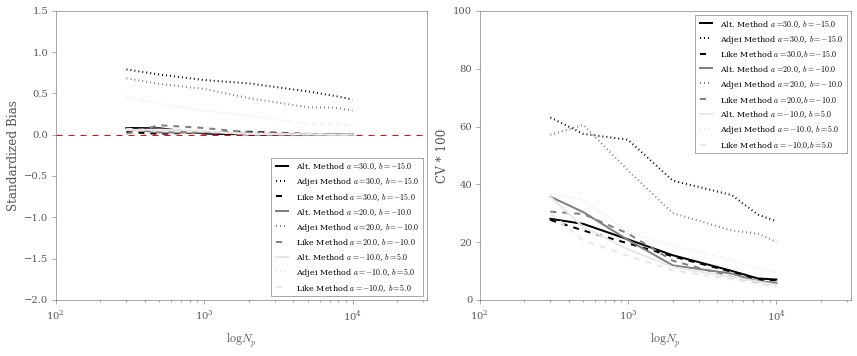

In [23]:
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000] 
plot_simulations([third_sim, first_sim, second_sim], [(30, -15), (20, -10), (-10, 5)], 
                 "no_crof_bias_LD502_k1.pdf", N_vals, ylims=[(-2, 1.5), (0, 100)])

## Scenario II with k = 1, 0.5, 0.1

Plotting the results from the fitting with crofton's method

In [25]:
# Load in data from fit with crofton LD50 = exp(2); a=20, b=-10
plot_vals_sim_nocrof = pd.read_pickle("../results/with_crofton_fit_multiple_Np1.pkl")
N_avgs_sim_nocrof = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs1.pkl")

# Load in data from fit with crofton LD50 = exp(2); a=10, b=-5
plot_vals_sim_nocrof2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np2.pkl")
N_avgs_sim_nocrof2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs2.pkl")

# Load in data from fit with crofton LD50 = exp(2); a=30, b=-10
plot_vals_sim_nocrof3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np3.pkl")
N_avgs_sim_nocrof3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs3.pkl")

# Load in data from fit with crofton LD50 = exp(2); a=20, b=-10
plot_vals_sim_nocrof_kpoint5_1 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint5_1.pkl")
N_avgs_sim_nocrof_kpoint5_1 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint5_1.pkl")

# # Load in data from fit with crofton LD50 = exp(2); a=10, b=-5
plot_vals_sim_nocrof_kpoint5_2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint5_2.pkl")
N_avgs_sim_nocrof_kpoint5_2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint5_2.pkl")

# # Load in data from fit with crofton LD50 = exp(2); a=30, b=-10
plot_vals_sim_nocrof_kpoint5_3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint5_3.pkl")
N_avgs_sim_nocrof_kpoint5_3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint5_3.pkl")

# Load in data from fit with crofton LD50 = exp(2); a=20, b=-10
plot_vals_sim_nocrof_kpoint1_1 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint1_1.pkl")
N_avgs_sim_nocrof_kpoint1_1 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint1_1.pkl")

# # Load in data from fit with crofton LD50 = exp(2); a=10, b=-5
plot_vals_sim_nocrof_kpoint1_2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint1_2.pkl")
N_avgs_sim_nocrof_kpoint1_2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint1_2.pkl")

# # Load in data from fit with crofton LD50 = exp(2); a=30, b=-10
plot_vals_sim_nocrof_kpoint1_3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint1_3.pkl")
N_avgs_sim_nocrof_kpoint1_3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint1_3.pkl")

In [26]:
reload(cfm)
# k = 1
first_sim_without = cfm.extract_parameters(plot_vals_sim_nocrof, 20, -10)
second_sim_without = cfm.extract_parameters(plot_vals_sim_nocrof2, 10, -5)
third_sim_without = cfm.extract_parameters(plot_vals_sim_nocrof3, 30, -15)

# k = 0.5
first_sim_without_kpoint5 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint5_1, 20, -10)
second_sim_without_kpoint5 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint5_2, 10, -5)
third_sim_without_kpoint5 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint5_3, 30, -15)

# k = 0.1
first_sim_without_kpoint1 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint1_1, 20, -10)
second_sim_without_kpoint1 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint1_2, 10, -5)
third_sim_without_kpoint1 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint1_3, 30, -15)

## Plot the bias the a parameters for all three levels of k

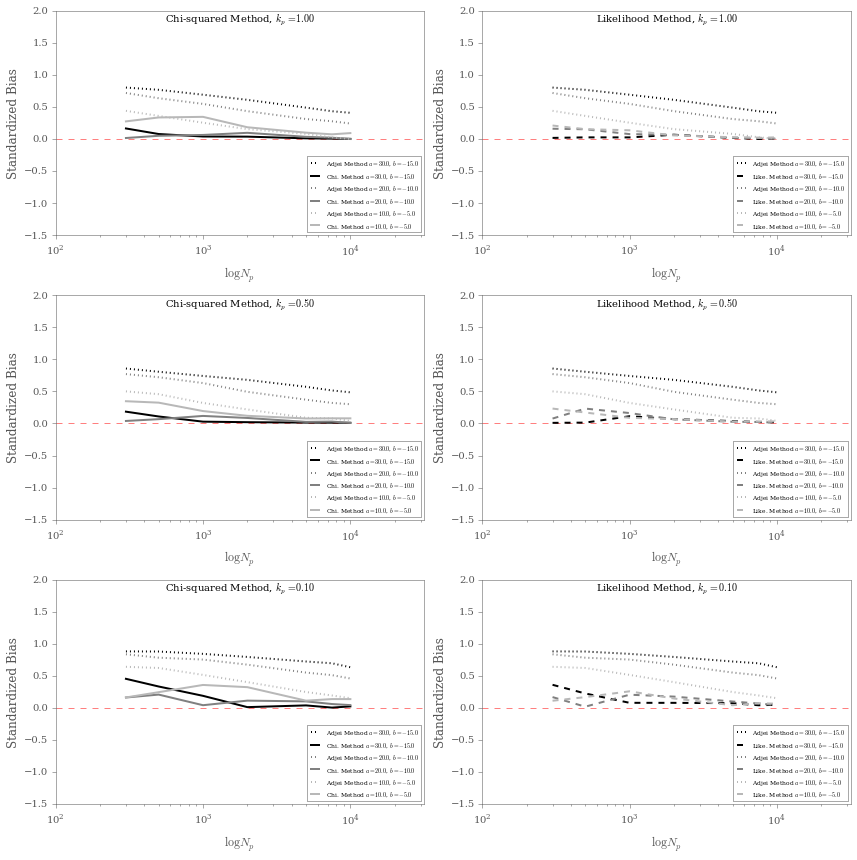

In [27]:
# Plot the biases for the a and b estimates 
reload(cfm)
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000] 
cfm.plot_bias([[third_sim_without, first_sim_without, second_sim_without], 
               [third_sim_without_kpoint5, first_sim_without_kpoint5, second_sim_without_kpoint5],
               [third_sim_without_kpoint1, first_sim_without_kpoint1, second_sim_without_kpoint1]],
               [(30, -15), (20, -10), (10, -5)], 
                 "scenario2_bias_LD502.pdf", N_vals, ks=[1, 1, 0.5, 0.5, 0.1, 0.1], 
                 ylims=(-1.5, 2), figsize=(12, 12))

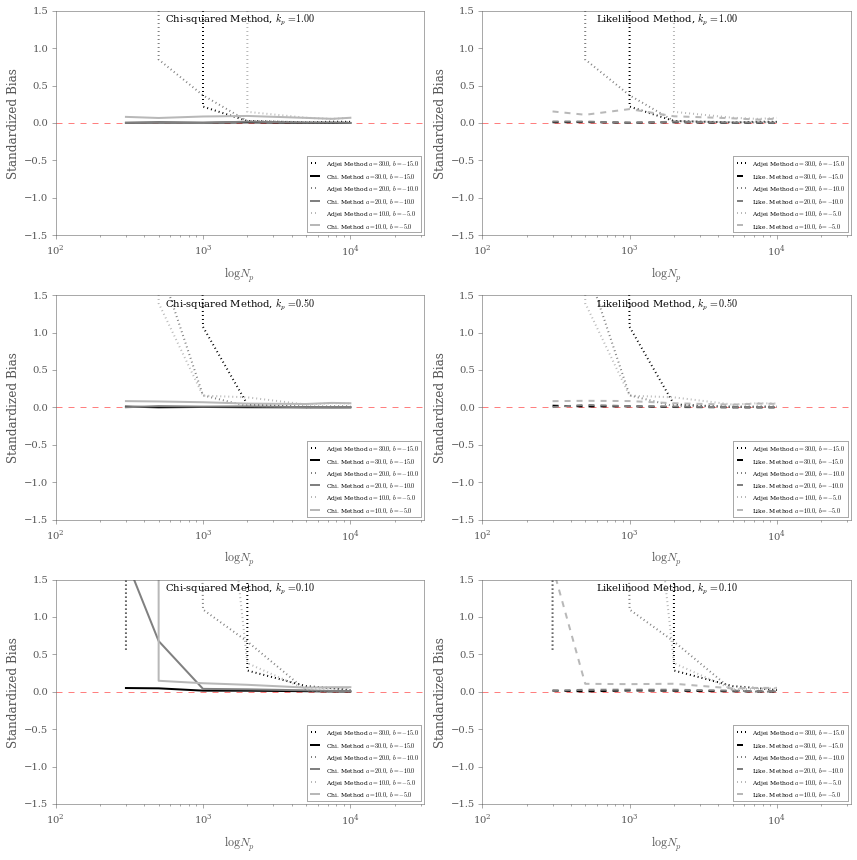

In [30]:
# Plot the biases for LD50
reload(cfm)
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000] 
cfm.plot_bias([[third_sim_without, first_sim_without, second_sim_without], 
               [third_sim_without_kpoint5, first_sim_without_kpoint5, second_sim_without_kpoint5],
               [third_sim_without_kpoint1, first_sim_without_kpoint1, second_sim_without_kpoint1]],
               [(30, -15), (20, -10), (10, -5)], 
                 "scenario2_bias_only_LD502.pdf", N_vals, ks=[1, 1, 0.5, 0.5, 0.1, 0.1], 
                 ylims=(-1.5, 1.5), figsize=(12, 12), ld50=True)

In [ ]:
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000]
cfm.plot_bias([[third_sim_without, first_sim_without, second_sim_without], 
           [third_sim_without_kpoint5, first_sim_without_kpoint5, second_sim_without_kpoint5]], [(30, -15), (20, -10), (10, -5)], 
                 "scenario2_bias_LD502.png", N_vals, ylims=(-1.5, 1))

### Still in scenario II, but now plotting results with k = 0.5

In [23]:
# Load in data from fit with crofton LD50 = exp(2); a=20, b=-10
plot_vals_sim_nocrof_kpoint5_1 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint5_1.pkl")
N_avgs_sim_nocrof_kpoint5_1 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint5_1.pkl")

# # Load in data from fit with crofton LD50 = exp(2); a=10, b=-5
plot_vals_sim_nocrof_kpoint5_2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint5_2.pkl")
N_avgs_sim_nocrof_kpoint5_2 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint5_2.pkl")

# # Load in data from fit with crofton LD50 = exp(2); a=30, b=-10
plot_vals_sim_nocrof_kpoint5_3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_kpoint5_3.pkl")
N_avgs_sim_nocrof_kpoint5_3 = pd.read_pickle("../results/with_crofton_fit_multiple_Np_Navgs_kpoint5_3.pkl")

In [24]:
first_sim_without_kpoint5 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint5_1, 20, -10)
second_sim_without_kpoint5 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint5_2, 10, -5)
third_sim_without_kpoint5 = cfm.extract_parameters(plot_vals_sim_nocrof_kpoint5_3, 30, -15)

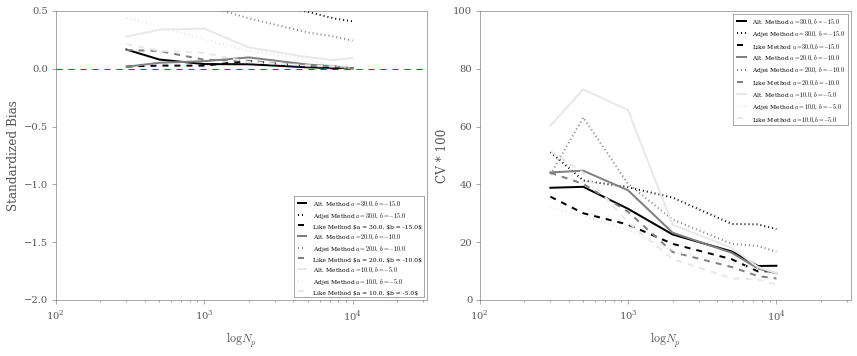

In [29]:
N_vals = [300, 500, 1000, 2000, 5000, 7500, 10000]
plot_simulations([third_sim_without, first_sim_without, second_sim_without], 
                 [(30, -15),(20, -10), (10, -5)], 
                 "crof_bias_LD502_kpoint5.png", N_vals)

## General conclusions

The Adjei Method works ok for large sample sizes, though it is getting the right answer for the wrong reasons.  The likelihood method seems to be the best option for estimating PIHM: the least influenced by sample size and the least bais.  The Chi-squared methods comes in second, but is problematic due to its reliance on $N_p$ and need for binning.  The likelihood method just seems more powerful all the way around. 